In [1]:
import pandas as pd

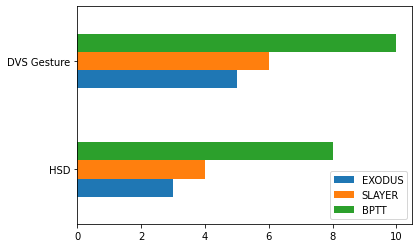

In [6]:
bptt = [8, 10]

slayer = [4, 6]

exodus = [3, 5]

index = ['HSD', 'DVS Gesture']

df = pd.DataFrame({'EXODUS': exodus,
                   'SLAYER': slayer,
                   'BPTT': bptt,
                   }, index=index)

ax = df.plot.barh()